#### Problem Statement

-To Classify whether or not a customer subscribes to a term deposit upon getting a call from the bank to attract more term deposits and ultimately improve the Net Interest Margin, NIM (Net Interest Income, NII net Net Interest Expense, NIE)

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 180)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta
from datetime import datetime
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import xgboost as xgb
from boruta import BorutaPy
import lightgbm as lgb
from catboost import CatBoostRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import precision_recall_curve
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn import metrics
from sklearn.metrics import log_loss, auc, roc_auc_score
from sklearn.preprocessing import RobustScaler,StandardScaler
from scipy.stats import ks_2samp
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, accuracy_score, classification_report, confusion_matrix, f1_score, \
    roc_auc_score, precision_score, recall_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import shap
from shap import summary_plot
from explainerdashboard import ClassifierExplainer
import joblib
import pickle

Loading the Data From Kaggle

In [2]:
data = pd.read_csv('Bank-term-deposit.csv')
data

,Age,Job,Marital,Education,Default,housing,Loan,Contact,Month,day_of_week,duration,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes


#### Data

1. Age - Age of Customer
2. Job -Occupation of Customer
3. Marital - Marital Status of Customer
4. Education - Education Level of Customer
5. Default - Has their Credit defaulted?
6. Housing - Does the Customer have a Housing Loan?
7. Loan - Does the Customer have a Personal Loan?
8. Contact - Means of Communication
9. Month - Last Contact Month
10. Day_of_Week - Last Contact Day of the Week
11. Duration - Last Contact Duration (in seconds)
12. Campaign - Number of Contacts Performed For This Client During This Campaign
13. pdays - Number of Days That Passed by After The Client was Last Contacted From a Previous Campaign
14. previous -Number of Contacts Performed For This Client Before This Campaign
15. poutcome -Outcome of The Previous Marketing Campaign
16. empvarrate - Employment Variation Rate (quarterly indicator)
17. conspriceidx - Consumer Price Index (monthly indicator)
18. consconfidx - Consumer Confidence Index (monthly indicator)
19. euribor3m - Euribor 3 - Month Rate (daily indicator) 
20. nremployed - Number of Employees (quarterly indicator)
21. y - Has the Client Subscribed a Term Deposit?

In [3]:
data.shape

(41188, 21)

### Exploratory Data Analysis

In [4]:
#Data has no missing Values
data.isna().sum()

Age             0
Job             0
Marital         0
Education       0
Default         0
housing         0
Loan            0
Contact         0
Month           0
day_of_week     0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
empvarrate      0
conspriceidx    0
consconfidx     0
euribor3m       0
nremployed      0
y               0
dtype: int64

In [5]:
#Numerical Columns
data_num = data.select_dtypes(include = 'number')

#Categorical Columns
data_obj = data.select_dtypes(include = 'object')


In [6]:
data_num

,Age,duration,campaign,pdays,previous,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed
0,56,261,1,999,0,1.10,93.99,-36.40,4.86,5191.00
1,57,149,1,999,0,1.10,93.99,-36.40,4.86,5191.00
2,37,226,1,999,0,1.10,93.99,-36.40,4.86,5191.00
3,40,151,1,999,0,1.10,93.99,-36.40,4.86,5191.00
4,56,307,1,999,0,1.10,93.99,-36.40,4.86,5191.00
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.10,94.77,-50.80,1.03,4963.60
41184,46,383,1,999,0,-1.10,94.77,-50.80,1.03,4963.60
41185,56,189,2,999,0,-1.10,94.77,-50.80,1.03,4963.60
41186,44,442,1,999,0,-1.10,94.77,-50.80,1.03,4963.60


#### 1. Univariate Analysis on Numerical Columns

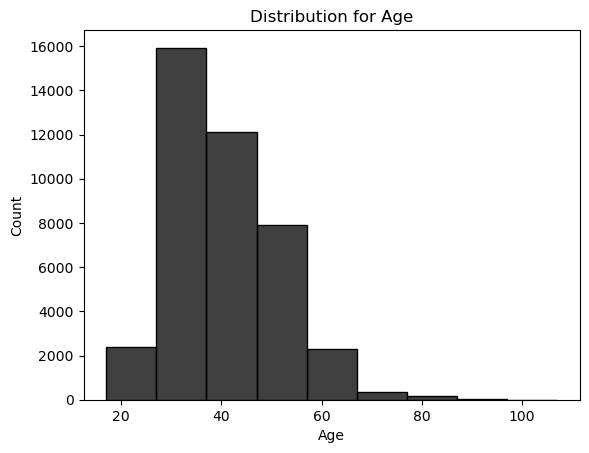

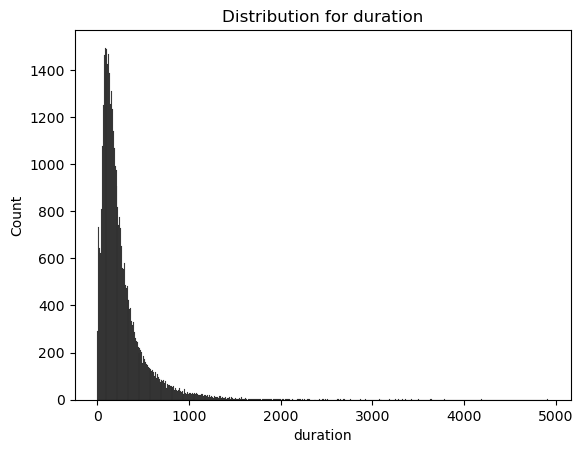

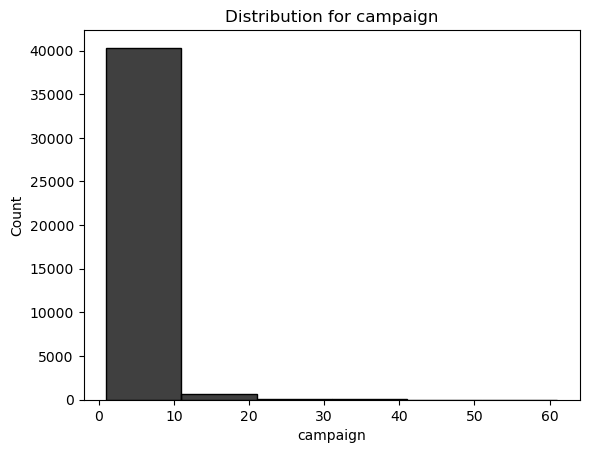

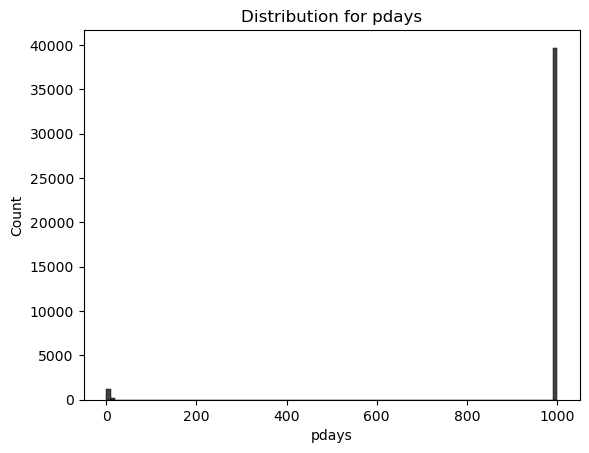

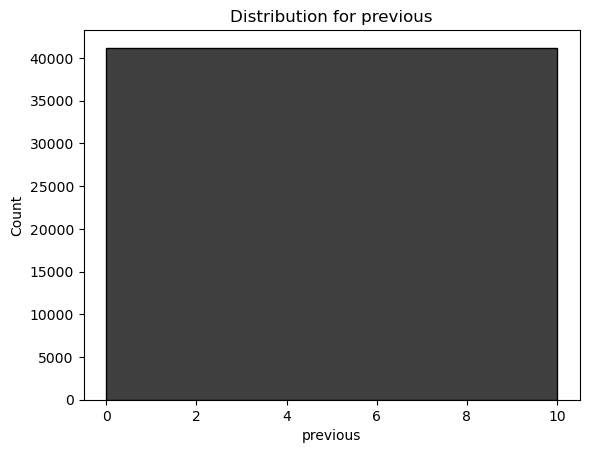

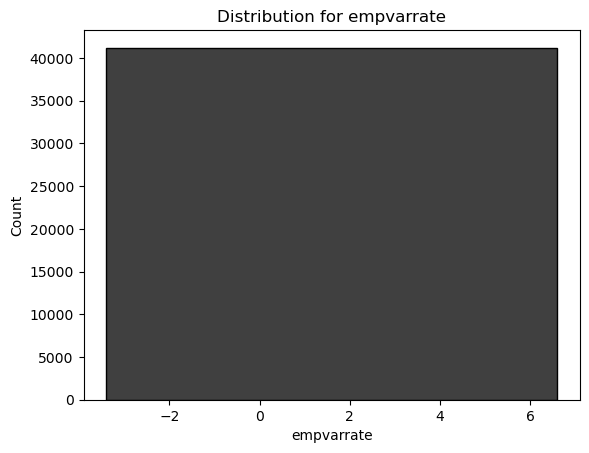

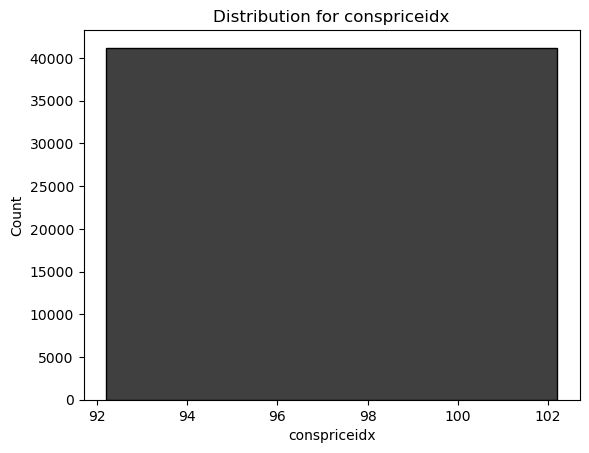

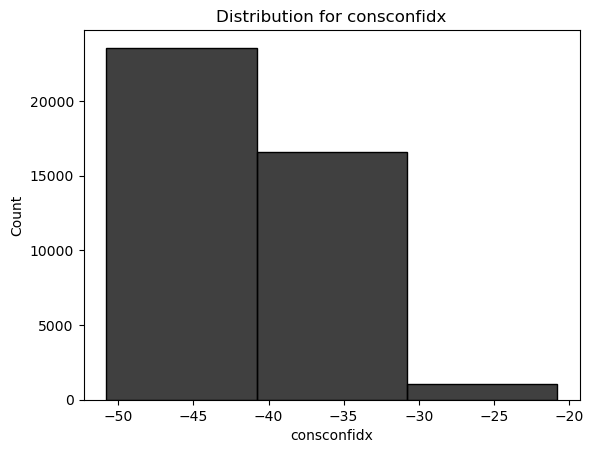

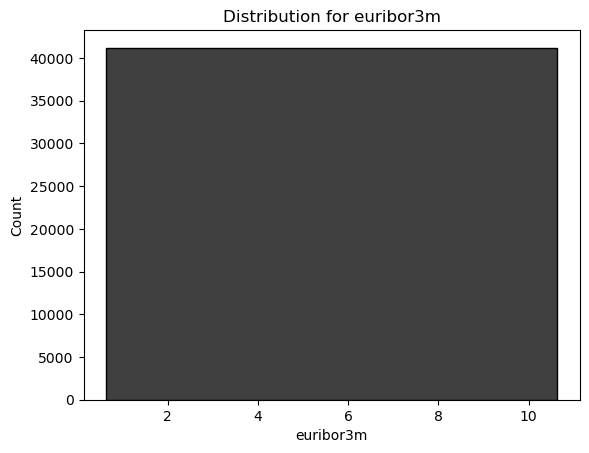

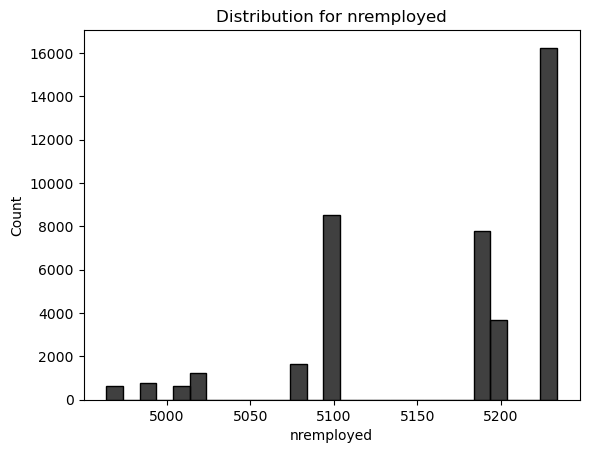

In [7]:
cols = data_num.columns

for col in cols:
    plt.figure()
    sns.histplot(data=data_num[col], color = 'black', binwidth=10)
    plt.title(f'Distribution for {col}')
    plt.xlabel(col)
    plt.show()


#Majority of the customers contacted are between 30 - 50 years old

#Majority of the customers were last contacted for less than 1000 seconds

#Majority of the customers were contacted less than 10 times  during the current campaign

#Majority of the customers were contacted less than 10 times  during the current campaign

#For majority of the customers, 1000 days had passed since they were contacted after a previous campaign

#### 2. Univariate Analysis on Categorical Columns

In [8]:
data_obj

,Job,Marital,Education,Default,housing,Loan,Contact,Month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


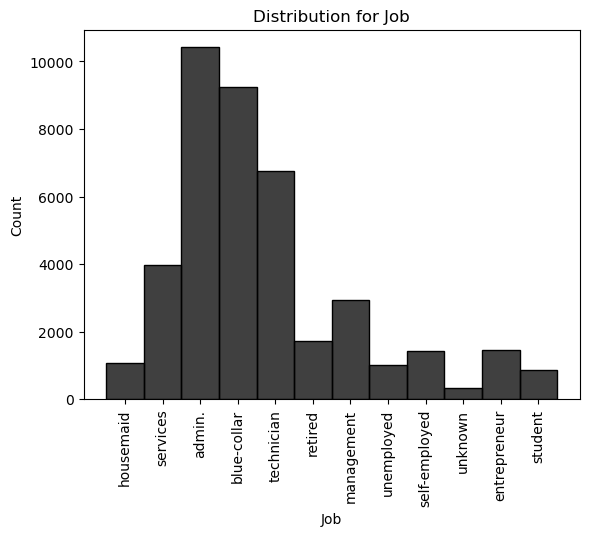

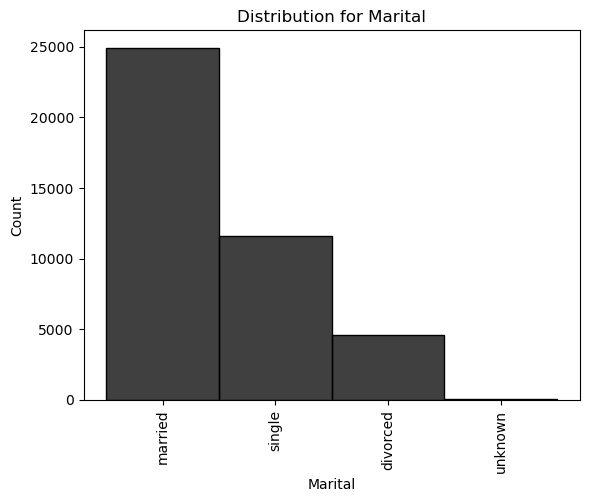

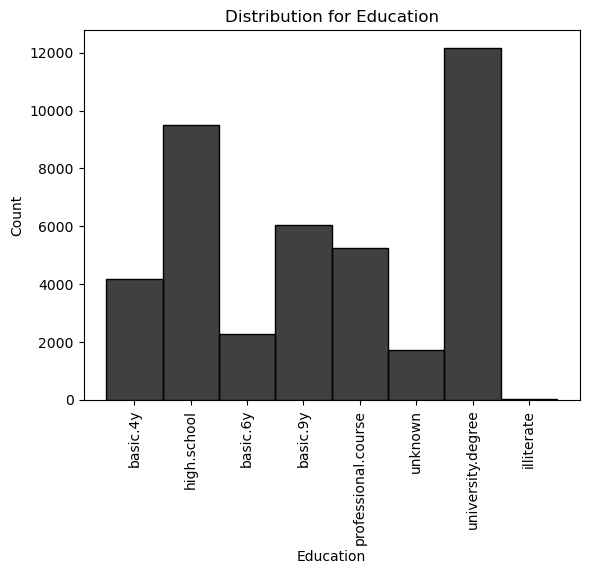

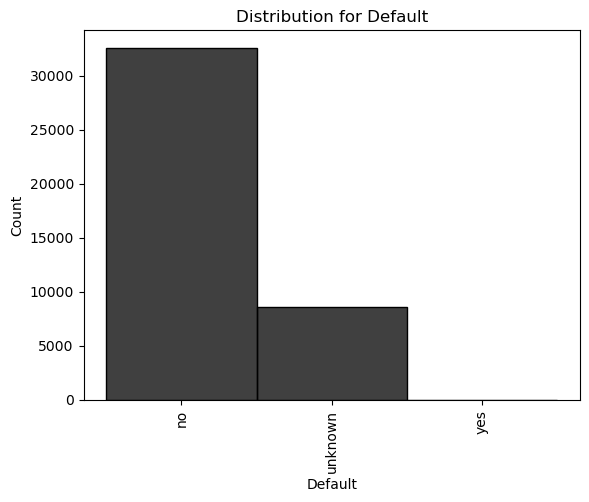

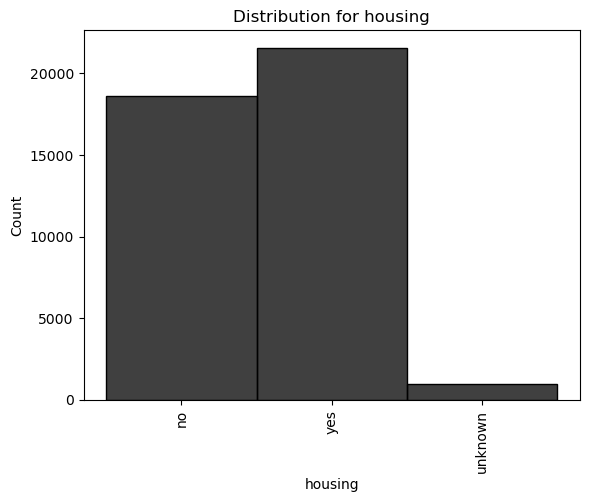

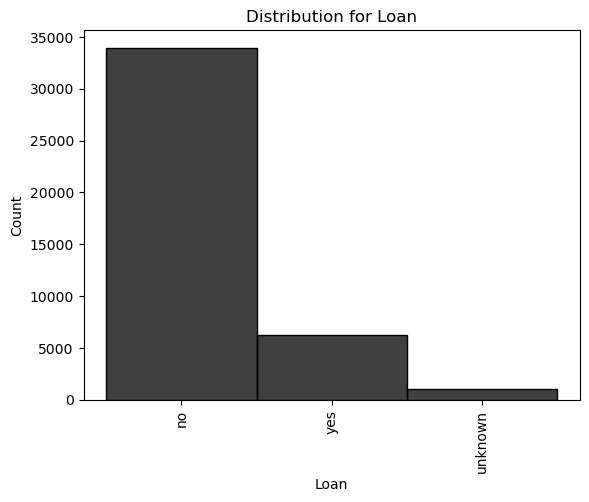

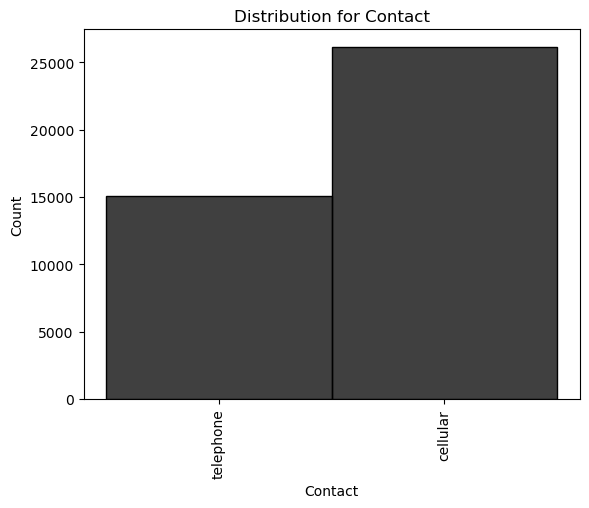

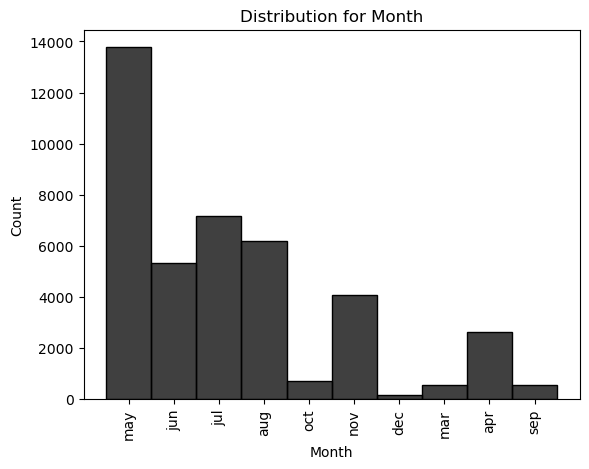

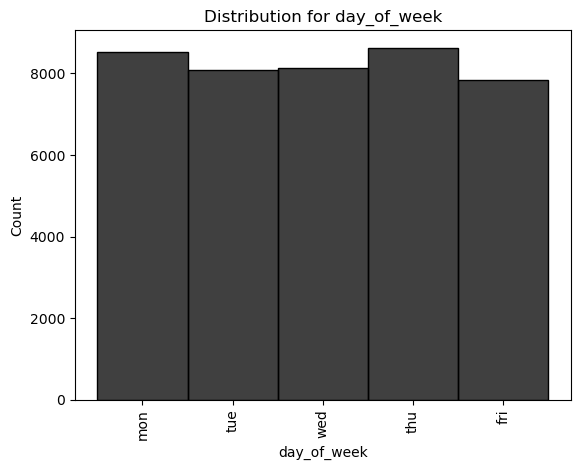

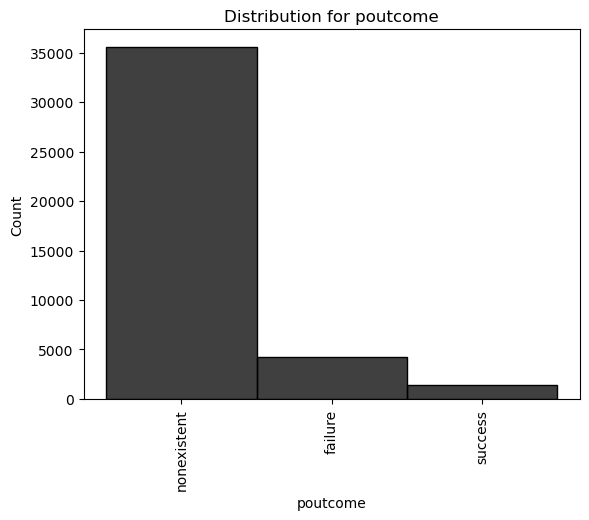

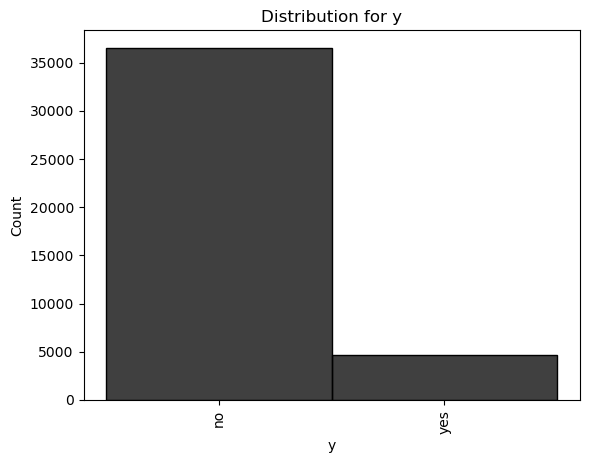

In [9]:
cols = data_obj.columns

for col in cols:
    plt.figure()
    sns.histplot(data=data_obj[col], color = 'black', binwidth=10)
    plt.title(f'Distribution for {col}')
    plt.xlabel(col)
    plt.xticks(rotation =90)
    plt.show()

#Majority of the Customers contacted had admin, blue-collar and technician jobs

#Most were married

#Most had high school level and university education level

#Most of them had not defaulted on their credit

#A higher population had a Housing Loan

#A higher population did not have a personal loan

#Most had been contacted through Cellular means

#Majority had last been contacted in the Month of May

#Distribution of Contatc was uniform across the days of the week

#During the last campaign, outcome of contact was mostly non-existent with a very small success outcome

#Most of the customers have not taken up fixed deposits

#### 3. Bivariate Analysis on Macroeconomic Features

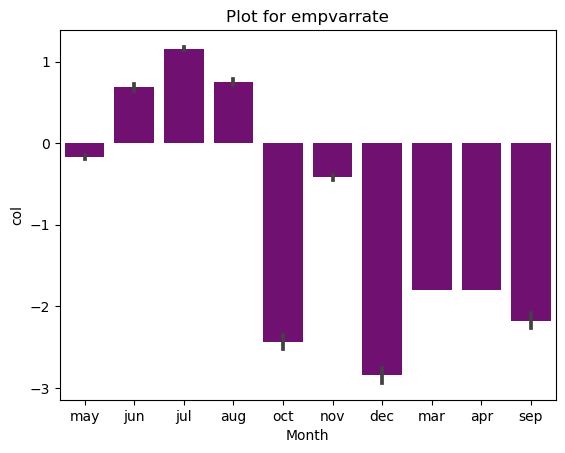

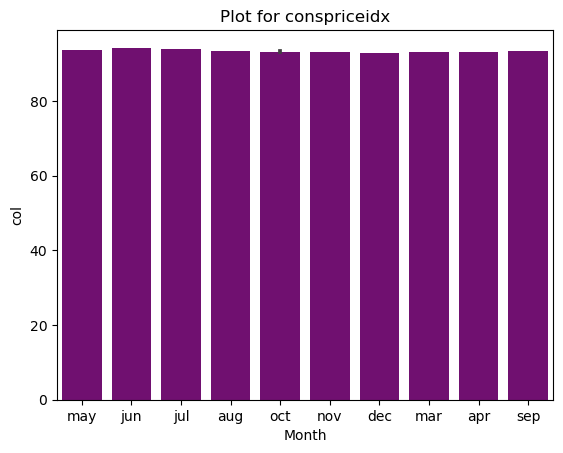

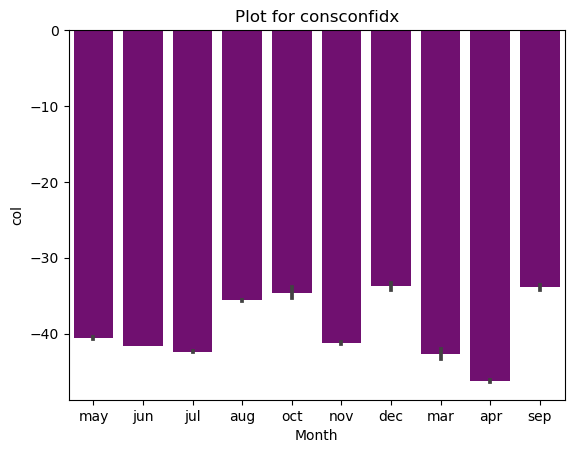

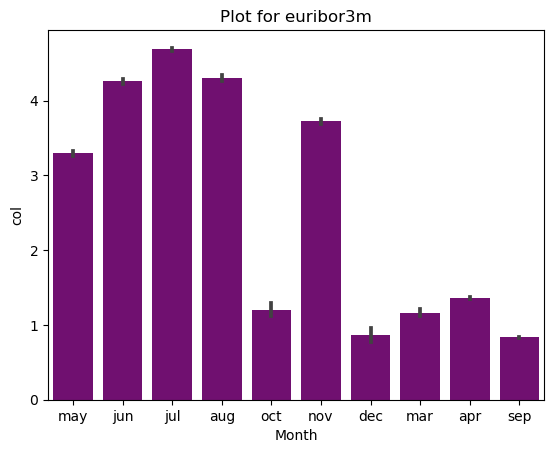

In [10]:
sub = data[['Month', 'empvarrate', 'conspriceidx', 'consconfidx', 'euribor3m', 'nremployed']]
cols = ['empvarrate', 'conspriceidx', 'consconfidx', 'euribor3m']

for col in cols:
    plt.figure()
    sns.barplot(data=sub, x='Month', y = col,  color = 'purple')
    plt.title(f'Plot for {col}')
    plt.xlabel('Month')
    plt.ylabel('col')
    plt.show()

In [11]:
sub['conspriceidx'].min(), sub['conspriceidx'].max()

(92.201, 94.767)

#Employment rate increased only for 3 out of the 10 months contact was recorded and declined for the other 7


#Consumer Price Index remained relatively stable, between 92.201 - 94.767 for the 10 months


#Consumer Confidence Index remained negative for the 10 months


#Euribor rates were quite volatile pver the ten months, with rates rising highest in July and falling lowest in December


### Feature Processing

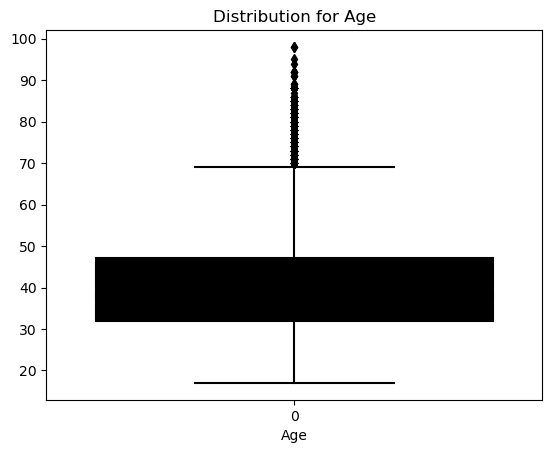

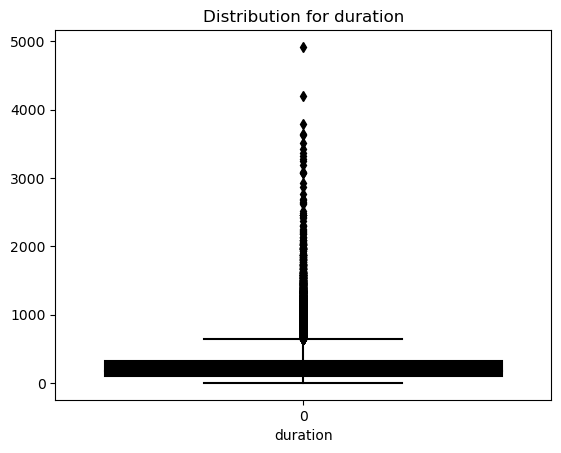

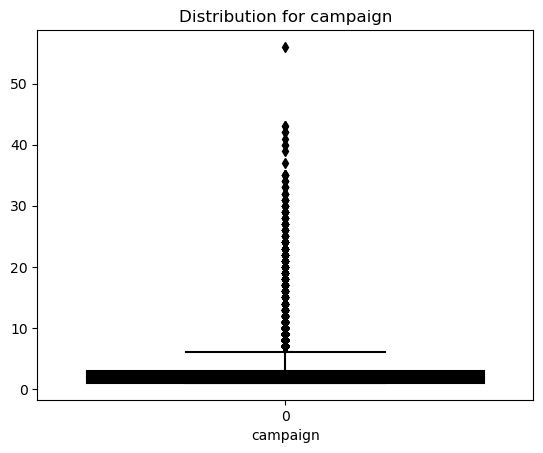

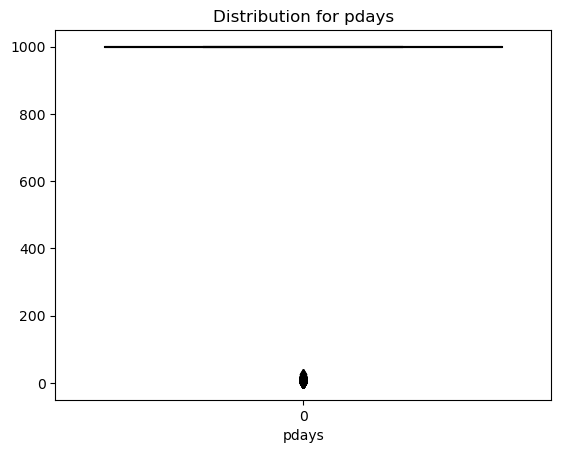

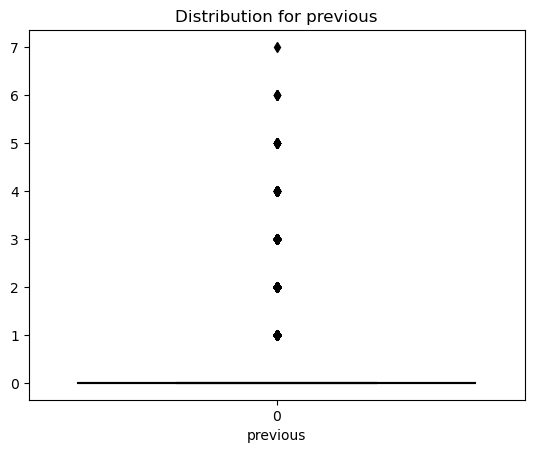

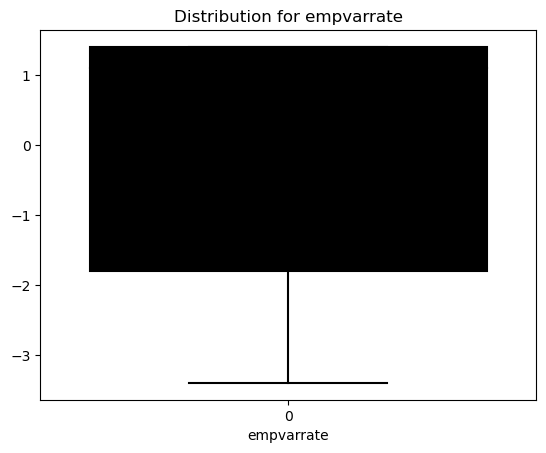

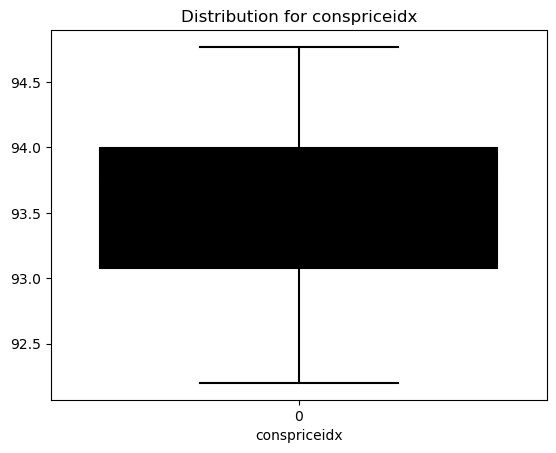

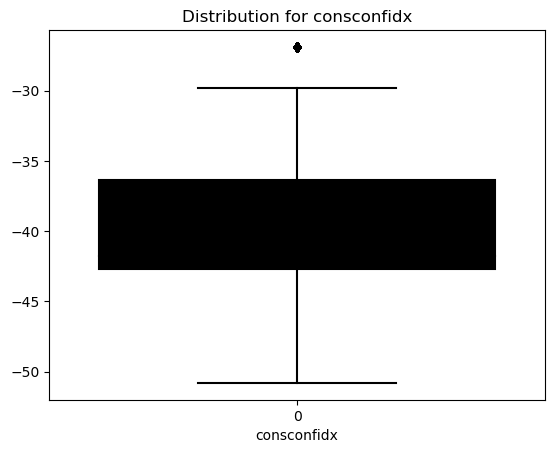

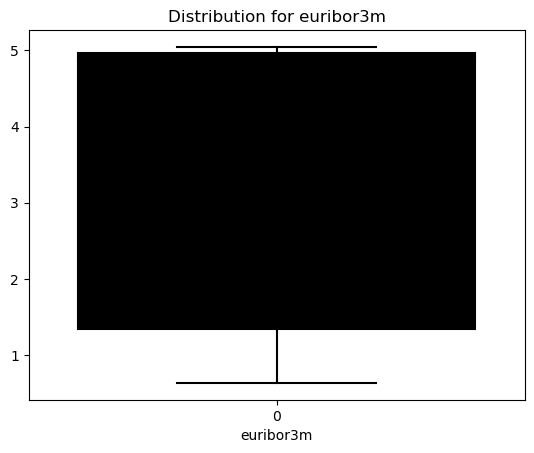

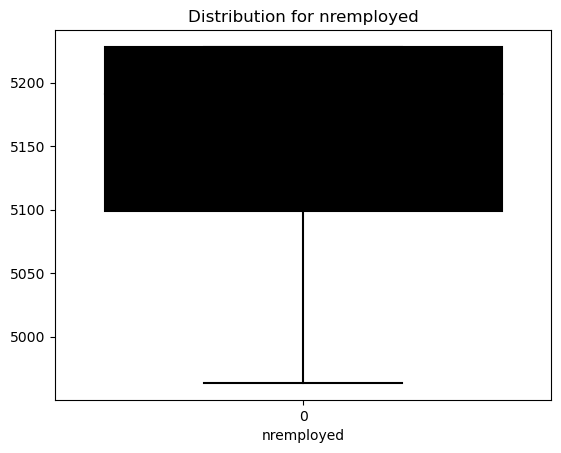

In [12]:
#Checking for Outliers
cols = data_num.columns

for col in cols:
    plt.figure()
    sns.boxplot(data=data_num[col], color = 'black')
    plt.title(f'Distribution for {col}')
    plt.xlabel(col)
    plt.show()

In [13]:
#Outlier Treatment

In [14]:
data.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'housing', 'Loan',
       'Contact', 'Month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'empvarrate', 'conspriceidx', 'consconfidx',
       'euribor3m', 'nremployed', 'y'],
      dtype='object')

### Modelling
-The problem is a Supervised Problem, precidicting Yes or No, a Category

#### 1. Feature Selection
-Using CatBoost and XGBoost

In [15]:
#Split the data into train and test

#No. of rows for train and test

train_size = int(0.80*len(data))
test_size = len(data) - train_size

# Sample the training set
train = data.sample(n=train_size, random_state=42)

# Sample the test set (exclude the rows already in the training set)
test = data.drop(train.index).sample(n=test_size, random_state=42)

train.shape, test.shape

((32950, 21), (8238, 21))

In [16]:
#Splitting Data into Dependent, Y and Independent Variable, X

X = data.drop(['y'], axis =1)
Y = data['y']

#Perform train_test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=42)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((30891, 20), (10297, 20), (30891,), (10297,))

In [17]:
#X dataframe dtypes with target variable removed
nums = data.select_dtypes(include = 'number').columns.tolist()
cats = data.select_dtypes(include = 'object')
cats = cats.astype('category')
cats = cats.columns.tolist()
cats.remove('y')

nums, cats, Y.unique()

(['Age',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'empvarrate',
  'conspriceidx',
  'consconfidx',
  'euribor3m',
  'nremployed'],
 ['Job',
  'Marital',
  'Education',
  'Default',
  'housing',
  'Loan',
  'Contact',
  'Month',
  'day_of_week',
  'poutcome'],
 array(['no', 'yes'], dtype=object))

>1. CatBoost

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

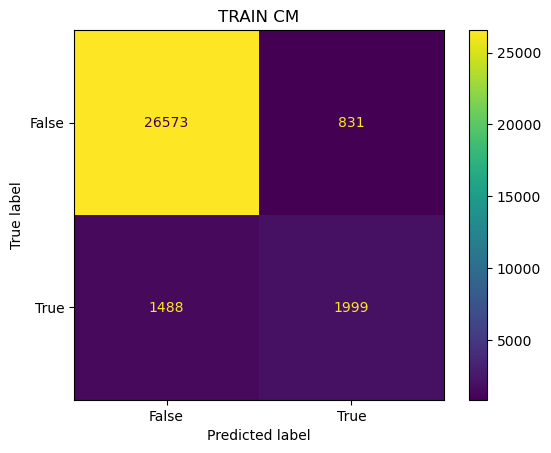

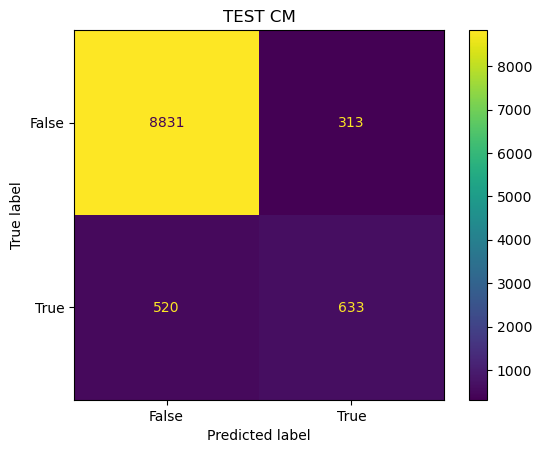

In [18]:
#Initializing CatBoostClassifier
clf = CatBoostClassifier(iterations = 50, random_seed =42, early_stopping_rounds=50)

#Fitting the Initialized Classifier
clfmodel = clf.fit(X_train, Y_train, cat_features=cats, verbose=False, plot =True, eval_set=(X_test, Y_test))

#Predict the Outcome on Train 
train_pred = clfmodel.predict(X_train)

#Predict the Outcome on Test             
test_pred = clfmodel.predict(X_test)

#Plot Confusion Matrix Plots
'''
A confusion matrix is a table used in classification problems to assess whether errors in the model were made. 
The Rows represent the actual classes the outcomes should have been.
The Columns represent the predictions that were made.
Using metrics from Sklearn, the function is:
    #confusion_matrix = metrics.confusion_matrix(actual, predicted)
To create a visual, you convert the table into a Confusion Matrix Display:
    #cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels= [False, True])
'''

#Train
confusion_matrix_train = metrics.confusion_matrix(Y_train, train_pred)
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, display_labels = [False, True] )
cm_plot.plot()
plt.title('TRAIN CM')

#Test
confusion_matrix_test = metrics.confusion_matrix(Y_test, test_pred)
cm_plot1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [False, True])
cm_plot1.plot()
plt.title('TEST CM')

#Plots
plt.show()

>> Results of Confusion Matrix

-Top left (True Negative (TN); has a FF) -

-Top right (False Positive (FP); has an FT) -

-Bottom left (False Negative (FN) - 

-Bottom right (True Positive (TP)

In [19]:
#Evaluating using Accuracy, Precision, Recall and F1 Score

#Accuracy
accuracy_train = metrics.accuracy_score(Y_train, train_pred)
accuracy_test = metrics.accuracy_score(Y_test, test_pred)

#Precision
precision_train = metrics.precision_score(Y_train, train_pred, pos_label='yes')
precision_test = metrics.precision_score(Y_test, test_pred, pos_label='yes')

#Recall
recall_train = metrics.recall_score(Y_train, train_pred, pos_label='yes')
recall_test = metrics.recall_score(Y_test, test_pred, pos_label='yes')

#F1 Score 
F1_score_train = metrics.f1_score(Y_train, train_pred, pos_label='yes')
F1_score_test = metrics.f1_score(Y_train, train_pred, pos_label='yes')

#Results
print("accuracy_train:", accuracy_train)
print("accuracy_test:", accuracy_test)
print("precision_train:", precision_train)
print("precision_test:", precision_test)
print("recall_train:", recall_train)
print("recall_test:", recall_test)
print("F1_score_train:", F1_score_train)
print("F1_score_test:", F1_score_test)

accuracy_train: 0.9249295911430514
accuracy_test: 0.9191026512576479
precision_train: 0.7063604240282686
precision_test: 0.6691331923890064
recall_train: 0.5732721537137941
recall_test: 0.5490026019080659
F1_score_train: 0.6328953617223365
F1_score_test: 0.6328953617223365


>>> Get the Feature Importance

In [20]:
#Get the feature importance scores
feature_importance = clfmodel.feature_importances_

#Store them in a dataframe
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

#In descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
10,duration,48.81
18,euribor3m,9.66
19,nremployed,8.80
15,empvarrate,6.56
8,Month,6.53
17,consconfidx,5.55
16,conspriceidx,3.12
7,Contact,2.98
11,campaign,2.26
0,Age,1.70


> 2. XGBOOST

In [21]:
#Encode the Data using LabelEncoder

dummies_df = pd.get_dummies(data, prefix_sep='_', columns=cats, drop_first=True)
dummies_df

,Age,duration,campaign,pdays,previous,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Job_unknown,Marital_married,Marital_single,Marital_unknown,Education_basic.6y,Education_basic.9y,Education_high.school,Education_illiterate,Education_professional.course,Education_university.degree,Education_unknown,Default_unknown,Default_yes,housing_unknown,housing_yes,Loan_unknown,Loan_yes,Contact_telephone,Month_aug,Month_dec,Month_jul,Month_jun,Month_mar,Month_may,Month_nov,Month_oct,Month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.10,93.99,-36.40,4.86,5191.00,no,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.10,93.99,-36.40,4.86,5191.00,no,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.10,93.99,-36.40,4.86,5191.00,no,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.10,93.99,-36.40,4.86,5191.00,no,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.10,93.99,-36.40,4.86,5191.00,no,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.10,94.77,-50.80,1.03,4963.60,yes,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
41184,46,383,1,999,0,-1.10,94.77,-50.80,1.03,4963.60,no,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
41185,56,189,2,999,0,-1.10,94.77,-50.80,1.03,4963.60,no,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
41186,44,442,1,999,0,-1.10,94.77,-50.80,1.03,4963.60,yes,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False


In [22]:
#Split the data into train and test

#No. of rows for train and test

train_size = int(0.80*len(dummies_df))
test_size = len(dummies_df) - train_size

# Sample the training set
train = dummies_df.sample(n=train_size, random_state=42)

# Sample the test set (exclude the rows already in the training set)
test = dummies_df.drop(train.index).sample(n=test_size, random_state=42)

train.shape, test.shape

#Define X and Y
X_encoded= dummies_df.drop('y', axis=1)
Y_encoded= dummies_df['y']

#Split train and test
X_encoded_train, X_encoded_test, Y_encoded_train, Y_encoded_test = train_test_split(X_encoded,Y_encoded, random_state=42)

X_encoded_train.shape, X_encoded_test.shape, Y_encoded_train.shape, Y_encoded_test.shape

((30891, 53), (10297, 53), (30891,), (10297,))

In [23]:
#Label_encoder
label_encoder = preprocessing.LabelEncoder()

# Fit and transform the categorical column to numerical labels
Y_encoded_train = label_encoder.fit_transform(Y_encoded_train)

>>> Get the Feature Importance

In [24]:
#Creating the Classifier
xgmodel = xgb.XGBClassifier()

#Fit the model
xgmodel.fit(X_encoded_train, Y_encoded_train)

#Get feature importance scores
importance_scores = xgmodel.feature_importances_

#Store them in a dataframe
feature_importance_df_xg = pd.DataFrame({'Feature': X_encoded_train.columns, 'Importance': importance_scores})

#In descending order
feature_importance_df_xg = feature_importance_df_xg.sort_values(by='Importance', ascending=False)
feature_importance_df_xg

,Feature,Importance
9,nremployed,0.47
1,duration,0.04
45,Month_oct,0.03
7,consconfidx,0.03
43,Month_may,0.03
52,poutcome_success,0.02
3,pdays,0.02
5,empvarrate,0.02
8,euribor3m,0.02
31,Default_unknown,0.01


>> Getting the Most important features from CatBoost

In [25]:
top_features_catboost = feature_importance_df.loc[feature_importance_df.Importance > 0.1]
top_features_catboost


,Feature,Importance
10,duration,48.81
18,euribor3m,9.66
19,nremployed,8.80
15,empvarrate,6.56
8,Month,6.53
17,consconfidx,5.55
16,conspriceidx,3.12
7,Contact,2.98
11,campaign,2.26
0,Age,1.70


> Checking for MultiCollinearity

<Axes: >

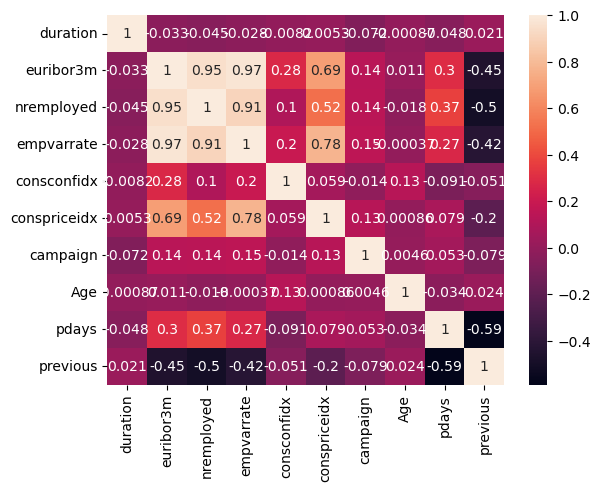

In [26]:
#Plot a correlation matrix
list1 = top_features_catboost['Feature'].tolist()
list2 = nums
common_features = [item for item in list1 if item in list2]

sns.heatmap(data[common_features].corr(), annot=True)

In [27]:
cor_matrix = data[common_features].corr().abs()
print(cor_matrix.shape)

(10, 10)


In [28]:
# Calculate VIF
df = data[common_features]

vif = pd.DataFrame()
vif["Features"] = df.columns

vif["VIF"] = [variance_inflation_factor(df, i) for i in range(df.shape[1])]

# Output the VIF values
vif = vif.sort_values(by="VIF", ascending=False).reset_index(drop=True)
vif

,Features,VIF
0,nremployed,26746.63
1,conspriceidx,22561.12
2,euribor3m,226.24
3,consconfidx,120.09
4,pdays,44.41
5,empvarrate,28.91
6,Age,16.05
7,duration,2.01
8,previous,2.00
9,campaign,1.92


In [29]:
#Best_features
vif_max = 250
to_drop = vif['VIF'] >vif_max

variables_to_drop = vif[to_drop]['Features'].tolist()

for variable in variables_to_drop:
    if variable in list1:
        list1.remove(variable)
        
my_features = list1
my_features

['duration',
 'euribor3m',
 'empvarrate',
 'Month',
 'consconfidx',
 'Contact',
 'campaign',
 'Age',
 'pdays',
 'poutcome',
 'Education',
 'Default',
 'Marital',
 'housing',
 'Job',
 'previous',
 'Loan']

#### 2. Modelling with CatBoost


In [30]:
#Splitting Data into Dependent, Y and Independent Variable, X
X = data[my_features]

Y = data['y']

#Perform train_test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=42)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((30891, 17), (10297, 17), (30891,), (10297,))

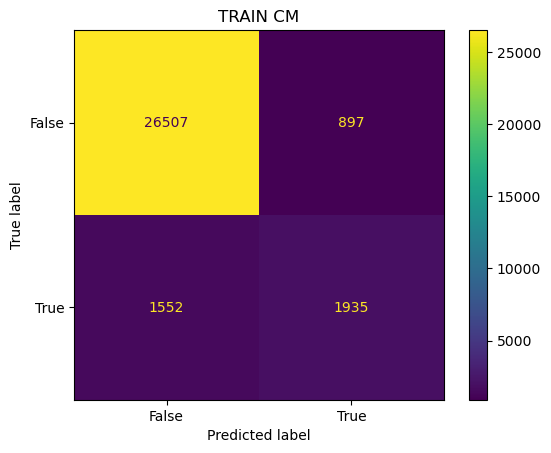

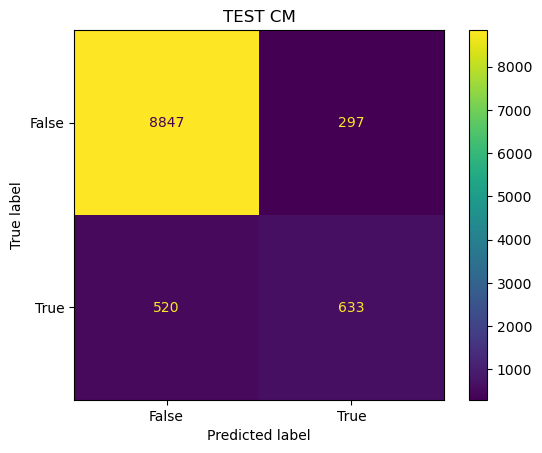

In [31]:
#Fitting the Initialized Classifier 
clfmodel = clf.fit(X_train, Y_train, cat_features=X.select_dtypes(include = 'object').columns.tolist(),
                   verbose=False, eval_set=(X_test, Y_test))

#Predict the Outcome on Train 
train_pred = clfmodel.predict(X_train)

#Predict the Outcome on Test             
test_pred = clfmodel.predict(X_test)

#Train
confusion_matrix_train = metrics.confusion_matrix(Y_train, train_pred)
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, display_labels = [False, True] )
cm_plot.plot()
plt.title('TRAIN CM')

#Test
confusion_matrix_test = metrics.confusion_matrix(Y_test, test_pred)
cm_plot1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [False, True])
cm_plot1.plot()
plt.title('TEST CM')

#Plots
plt.show()

> Model Evaluation

In [32]:
#Evaluating using Accuracy, Precision, Recall and F1 Score

#Accuracy
accuracy_train = metrics.accuracy_score(Y_train, train_pred)
accuracy_test = metrics.accuracy_score(Y_test, test_pred)

#Precision
precision_train = metrics.precision_score(Y_train, train_pred, pos_label='yes')
precision_test = metrics.precision_score(Y_test, test_pred, pos_label='yes')

#Recall
recall_train = metrics.recall_score(Y_train, train_pred, pos_label='yes')
recall_test = metrics.recall_score(Y_test, test_pred, pos_label='yes')

#F1 Score 
F1_score_train = metrics.f1_score(Y_train, train_pred, pos_label='yes')
F1_score_test = metrics.f1_score(Y_train, train_pred, pos_label='yes')

#Results
print("accuracy_train:", accuracy_train)
print("accuracy_test:", accuracy_test)
print("precision_train:", precision_train)
print("precision_test:", precision_test)
print("recall_train:", recall_train)
print("recall_test:", recall_test)
print("F1_score_train:", F1_score_train)
print("F1_score_test:", F1_score_test)

accuracy_train: 0.9207212456702599
accuracy_test: 0.9206565018937555
precision_train: 0.6832627118644068
precision_test: 0.6806451612903226
recall_train: 0.5549182678520218
recall_test: 0.5490026019080659
F1_score_train: 0.6124386770058553
F1_score_test: 0.6124386770058553


 >>> Check deviation between train and test performances

In [33]:
#Checking

accuracy = accuracy_train*100 - accuracy_test*100
precision = precision_train*100 -precision_test*100
recall = recall_train*100 - recall_test*100
F1_score = F1_score_train*100 -F1_score_test*100

print("accuracy_deviation:", accuracy)
print("precision_deviation:", precision)
print("recall_deviation:", recall)
print("F1_score_deviation:", F1_score)

accuracy_deviation: 0.0064743776504485595
precision_deviation: 0.261755057408422
recall_deviation: 0.5915665943955872
F1_score_deviation: 0.0


#### 3. Model Explainability Using Shap

-Shap plots displays SHAP values sorted by Magnitude of their Impact on Predictions

-Features on the Y-axis are listed from Top to Bottom based on their importance

-For each feature, the plot shows the horizontal bar. The colour of the bar indicates the feature's value eg red for high value and blue for low values

-The length of the bar represents the Magnitude of the SHAP value for that feature

-Positive SHAP values push predictions higher while negative ones push them lower

-The Vertical line represents the expected model output (usually the mean prediction and each feature's contribution is shown relative to this line

-Features to the left of the vertical line (with negative SHAP values) push predictions below the expected value while those to the right (with positive SHAP values) push predictions above the expected value


In [34]:
#Class Names
class_names=clfmodel.classes_
class_names

array(['no', 'yes'], dtype=object)

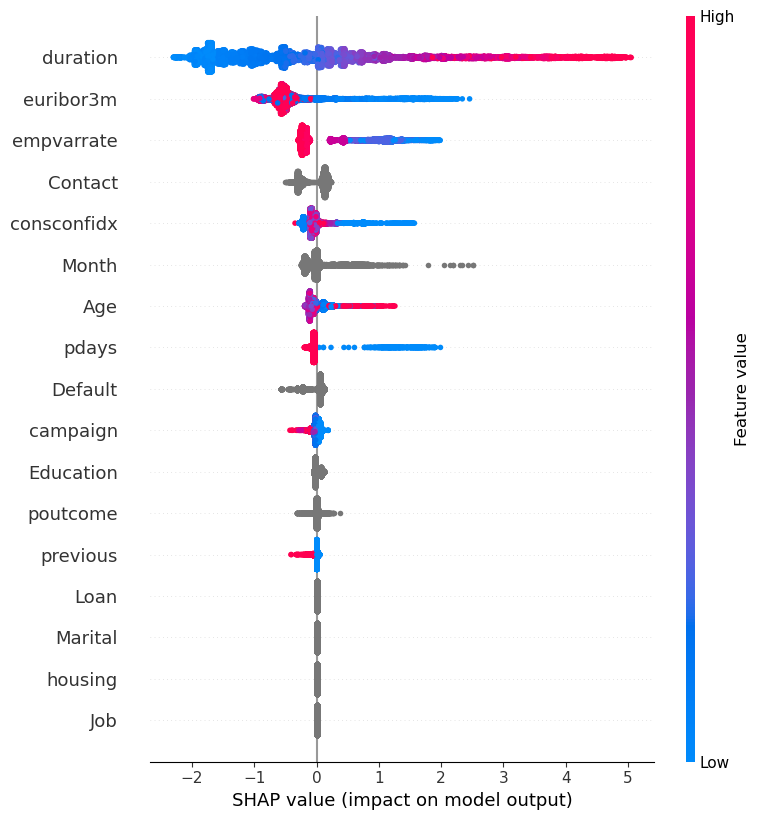

In [35]:
#Load the explainer
explainer= shap.TreeExplainer(clfmodel, feature_perturbation="tree_path_dependent")

#Generate values
shap_values = explainer.shap_values(X_test)

#Visualize 
shap.summary_plot(shap_values, X_test)


#Duration (last contact duration) and Euribor have the highest importance ranking in the Model's output

#Duration greatly affected the Subscription of Term Deposits among customers mmore than it affected non-subscription

#Euribor3m greatly affected Subcription

#Age, as a feature is greatly important and affected Subsription


In [36]:
#Save the Model
file_name = 'term_deposit_model.pkl'
with open(file_name, 'wb') as file:
    pickle.dump(clfmodel, file)